In [1]:
!pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.3 MB/s eta 0:00:00


# import all necessary libraries for the machine learning project

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tqdm 
import seaborn as sn
from sklearn import metrics, preprocessing, model_selection
import keras_tuner as kt

# Download the dataset using kaggle

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d alexteboul/heart-disease-health-indicators-dataset

 75% 2.00M/2.66M [00:01<00:00, 2.23MB/s]
100% 2.66M/2.66M [00:01<00:00, 2.45MB/s]


In [5]:
!unzip /content/heart-disease-health-indicators-dataset.zip

Archive:  /content/heart-disease-health-indicators-dataset.zip
  inflating: heart_disease_health_indicators_BRFSS2015.csv  


In [6]:
#read the data
data=pd.read_csv('/content/heart_disease_health_indicators_BRFSS2015.csv')
data

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


# prepressing the Dataset 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [8]:
# Check whether some values are NaN or not
pd.isna(data).sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [9]:
#Dropping columns having a missing values
data.dropna(inplace=True)

In [10]:
pd.isna(data).sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

array([[<AxesSubplot:title={'center':'HeartDiseaseorAttack'}>,
        <AxesSubplot:title={'center':'HighBP'}>,
        <AxesSubplot:title={'center':'HighChol'}>,
        <AxesSubplot:title={'center':'CholCheck'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'Smoker'}>,
        <AxesSubplot:title={'center':'Stroke'}>,
        <AxesSubplot:title={'center':'Diabetes'}>,
        <AxesSubplot:title={'center':'PhysActivity'}>,
        <AxesSubplot:title={'center':'Fruits'}>],
       [<AxesSubplot:title={'center':'Veggies'}>,
        <AxesSubplot:title={'center':'HvyAlcoholConsump'}>,
        <AxesSubplot:title={'center':'AnyHealthcare'}>,
        <AxesSubplot:title={'center':'NoDocbcCost'}>,
        <AxesSubplot:title={'center':'GenHlth'}>],
       [<AxesSubplot:title={'center':'MentHlth'}>,
        <AxesSubplot:title={'center':'PhysHlth'}>,
        <AxesSubplot:title={'center':'DiffWalk'}>,
        <AxesSubplot:title={'center':'Sex'}>,
        <AxesS

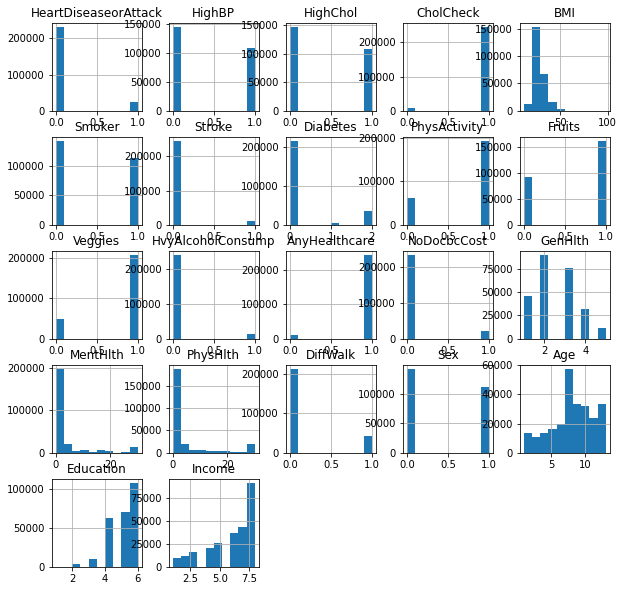

In [11]:
data.hist(figsize=(10,10))

In [12]:
#The describe() method returns description of the data in the DataFrame.
data.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [13]:
new_dataset = data[data.HeartDiseaseorAttack==1]
new_dataset = new_dataset.append(data[data.HeartDiseaseorAttack==0].sample(len(new_dataset)))

<AxesSubplot:>

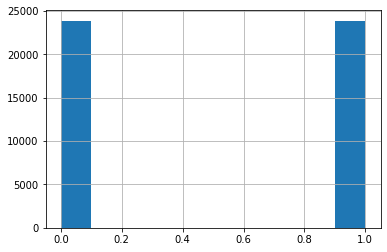

In [14]:
new_dataset.HeartDiseaseorAttack.hist()

In [15]:
# split the data to features and labels 
x=new_dataset.iloc[:,1:]
y=new_dataset.iloc[:,0]

In [16]:
# scale the feature values between 0,1
min_max_preprocess =preprocessing.MinMaxScaler()
min_max_preprocess.fit(x)
x_norm=min_max_preprocess.transform(x)

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>],
       [<AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>],
       [<AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>],
       [<AxesSubplot:title={'center':'15'}>,
        <AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>],
       [<AxesSubplot:title={'center':'20'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <Axes

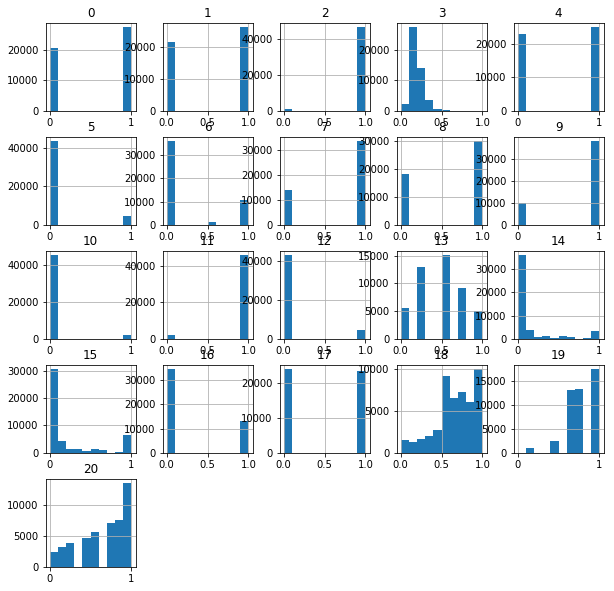

In [17]:
pd.DataFrame(x_norm).hist(figsize=(10,10))

In [18]:
#split the data into a training set and testing set.
x_train,x_test,y_train,y_test = model_selection.train_test_split(x_norm,y,test_size=0.2,random_state=42,stratify=y)

#Create the Data Pipeline

In [19]:
# creat the data pipeline
def data_pipeline(x,y,batch_size=32):
    # insert the data to the data pipeline
    data=tf.data.Dataset.from_tensor_slices((x,y))
    data=data.shuffle(50000)# shuffle the data
    data=data.batch(batch_size)# creat the batch
    data=data.prefetch(tf.data.AUTOTUNE)# run the data processing and training in parallel 
    return data

In [20]:
# create the train pipeline 
train_dataset=data_pipeline(x_train,y_train)
# create the test pipeline
test_dataset=data_pipeline(x_train[-1000:],y_train[-1000:])

In [21]:
# get the first batch of data from the train pipeline 
for x,y in train_dataset.take(1):
    print(x)
    print(y)

tf.Tensor(
[[1.         1.         1.         0.19767442 0.         0.
  0.         1.         0.         0.         0.         1.
  0.         0.5        0.         0.         0.         1.
  1.         1.         0.85714286]
 [0.         0.         1.         0.20930233 0.         0.
  0.         1.         1.         1.         0.         1.
  0.         0.5        0.         0.03333333 0.         0.
  0.41666667 0.8        0.85714286]
 [1.         1.         1.         0.18604651 1.         0.
  0.         1.         1.         1.         0.         0.
  0.         0.25       1.         0.         0.         1.
  0.5        0.6        0.71428571]
 [1.         0.         1.         0.20930233 1.         0.
  0.         0.         0.         0.         0.         1.
  0.         0.75       0.         0.         0.         0.
  0.58333333 0.8        0.71428571]
 [1.         1.         1.         0.1744186  1.         0.
  0.         0.         1.         0.         0.         1.
  1. 

# Model


In [22]:
class Model(tf.keras.Model):
    def __init__(self,units_tuner,activation_tuner,kernel_regularizer_tuner,dropout_tuner):
        super(Model,self).__init__()
        self.dropout_tuner=dropout_tuner
        activation_tuner=[tf.nn.relu,tf.nn.leaky_relu,tf.nn.elu][activation_tuner]


        self.D1=tf.keras.layers.Dense(units_tuner[0],activation=activation_tuner,kernel_regularizer=kernel_regularizer_tuner[0],name='D1')
        self.D1_dropout = tf.keras.layers.Dropout(0.3)
        self.D2=tf.keras.layers.Dense(units_tuner[1],activation=activation_tuner,kernel_regularizer=kernel_regularizer_tuner[1],name='D2')
        self.D2_dropout = tf.keras.layers.Dropout(0.3)
        self.D3=tf.keras.layers.Dense(units_tuner[2],activation=activation_tuner,kernel_regularizer=kernel_regularizer_tuner[2],name='D3')
        self.D3_dropout = tf.keras.layers.Dropout(0.3)
        self.D4=tf.keras.layers.Dense(units_tuner[3],activation=activation_tuner,kernel_regularizer=kernel_regularizer_tuner[3],name='D4')
        self.D4_dropout = tf.keras.layers.Dropout(0.3)
        self.D5=tf.keras.layers.Dense(units_tuner[4],activation=activation_tuner,kernel_regularizer=kernel_regularizer_tuner[4],name='D5')
        self.D5_dropout = tf.keras.layers.Dropout(0.3)
        self.out=tf.keras.layers.Dense(1,activation=tf.nn.sigmoid,name='out')
    def call(self,x ):
        x=self.D1(x)
        if self.dropout_tuner:
            x=self.D1_dropout(x)
        x=self.D2(x)
        if self.dropout_tuner:
            x=self.D2_dropout(x)
        x=self.D3(x)
        if self.dropout_tuner:
            x=self.D3_dropout(x)
        x=self.D4(x)
        if self.dropout_tuner:
            x=self.D4_dropout(x)
        x=self.D5(x)
        if self.dropout_tuner:
            x=self.D5_dropout(x)
        out = self.out(x)
        return out 

In [23]:
def model_builder(hp):
    # define the kernel values tuner 
    units_tuner=[hp.Int('D1', min_value=8, max_value=512, step=32),
                  hp.Int('D2', min_value=8, max_value=512, step=32),
                  hp.Int('D3', min_value=8, max_value=512, step=32),
                  hp.Int('D4', min_value=8, max_value=512, step=32),
                  hp.Int('D5', min_value=8, max_value=512, step=32)]
                 
    # define the activation function tuner 
    activation_tuner = hp.Choice('activation',[0,1,2])

    # define the kernel_regularizer_tuner
    kernel_regularizer_tuner=[hp.Choice('regularizer_1',['L1','L2','L1L2']),
                              hp.Choice('regularizer_2',['L1','L2','L1L2']),
                              hp.Choice('regularizer_3',['L1','L2','L1L2']),
                              hp.Choice('regularizer_4',['L1','L2','L1L2']),
                              hp.Choice('regularizer_5',['L1','L2','L1L2']),
                              ]
    # define the dropout_tuner
    dropout_tuner= hp.Choice('dropout',[True,False])
    
    
    model = Model(
                      units_tuner=units_tuner,
                      activation_tuner=activation_tuner,
                      kernel_regularizer_tuner=kernel_regularizer_tuner,
                      dropout_tuner=dropout_tuner,
                     
                      )
    
    model.build((None,21))# build the model 
    
    # define the learning rate tuner 
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    # compile the model 
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate), loss=tf.keras.losses.BinaryCrossentropy(), metrics=["accuracy"]
    )
    return model 

In [24]:
tuner = kt.BayesianOptimization(model_builder,
                     objective='val_loss',
                     max_trials=10,
                     directory='my_dir',
                     project_name='intro_to_kt')

In [25]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [26]:
tuner.search(train_dataset, epochs=50,validation_data=test_dataset , callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 10 Complete [00h 02m 31s]
val_loss: 0.43547677993774414

Best val_loss So Far: 0.43547677993774414
Total elapsed time: 00h 17m 33s


In [27]:
a=tuner.get_best_hyperparameters()[0]
a.values

{'D1': 296,
 'D2': 40,
 'D3': 104,
 'D4': 200,
 'D5': 392,
 'activation': 1,
 'regularizer_1': 'L2',
 'regularizer_2': 'L1L2',
 'regularizer_3': 'L2',
 'regularizer_4': 'L1L2',
 'regularizer_5': 'L1L2',
 'dropout': 0,
 'lr': 0.0001567123683813819}

##Model Evalution

In [28]:
#Get optimal hyperparameters and models from the tuner
model = tuner.hypermodel.build(tuner.get_best_hyperparameters()[0])

In [29]:
model.fit(train_dataset,epochs=50,validation_data=test_dataset)

Epoch 1/50
1195/1195 [==============================] - 8s 5ms/step - loss: 0.9340 - accuracy: 0.7554 - val_loss: 0.6387 - val_accuracy: 0.7960
Epoch 2/50
1195/1195 [==============================] - 5s 4ms/step - loss: 0.6159 - accuracy: 0.7737 - val_loss: 0.5256 - val_accuracy: 0.7950
Epoch 3/50
1195/1195 [==============================] - 5s 4ms/step - loss: 0.5534 - accuracy: 0.7745 - val_loss: 0.5116 - val_accuracy: 0.7860
Epoch 4/50
1195/1195 [==============================] - 5s 4ms/step - loss: 0.5280 - accuracy: 0.7750 - val_loss: 0.4748 - val_accuracy: 0.7980
Epoch 5/50
1195/1195 [==============================] - 5s 4ms/step - loss: 0.5144 - accuracy: 0.7757 - val_loss: 0.4690 - val_accuracy: 0.7920
Epoch 6/50
1195/1195 [==============================] - 5s 5ms/step - loss: 0.5051 - accuracy: 0.7746 - val_loss: 0.4618 - val_accuracy: 0.7950
Epoch 7/50
1195/1195 [==============================] - 5s 4ms/step - loss: 0.4998 - accuracy: 0.7737 - val_loss: 0.4545 - val_accuracy:

<AxesSubplot:>

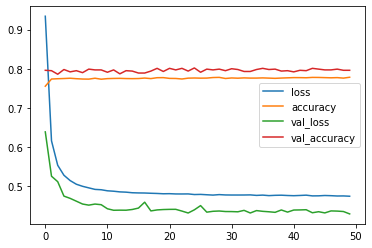

In [30]:
pd.DataFrame(model.history.history).plot()

In [31]:
preds=np.array([])
ys=np.array([])
for x,y in tqdm.tqdm(test_dataset):
    pred = model.predict(x)
    preds=np.append(preds,pred)
  
    ys=np.append(ys,y)

  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 133ms/step


  3%|▎         | 1/32 [00:00<00:06,  5.16it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 3/32 [00:00<00:02,  9.83it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 5/32 [00:00<00:02, 12.54it/s]

1/1 [==============================] - 0s 34ms/step


 22%|██▏       | 7/32 [00:00<00:02, 12.41it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 9/32 [00:00<00:01, 11.60it/s]

1/1 [==============================] - 0s 27ms/step


 34%|███▍      | 11/32 [00:00<00:01, 11.62it/s]

1/1 [==============================] - 0s 29ms/step


 41%|████      | 13/32 [00:01<00:01, 11.23it/s]

1/1 [==============================] - 0s 29ms/step


 47%|████▋     | 15/32 [00:01<00:01, 10.95it/s]

1/1 [==============================] - 0s 28ms/step


 53%|█████▎    | 17/32 [00:01<00:01, 11.06it/s]

1/1 [==============================] - 0s 28ms/step


 59%|█████▉    | 19/32 [00:01<00:01, 11.06it/s]

1/1 [==============================] - 0s 29ms/step


 66%|██████▌   | 21/32 [00:01<00:01, 10.94it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 23/32 [00:02<00:00, 10.99it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 25/32 [00:02<00:00, 10.43it/s]

1/1 [==============================] - 0s 32ms/step


 84%|████████▍ | 27/32 [00:02<00:00, 10.47it/s]

1/1 [==============================] - 0s 22ms/step


 91%|█████████ | 29/32 [00:02<00:00, 10.95it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 31/32 [00:02<00:00, 12.39it/s]

1/1 [==============================] - 0s 86ms/step


100%|██████████| 32/32 [00:02<00:00, 11.00it/s]


In [32]:
 preds = preds>0.5
 preds=preds.astype(int)

In [33]:
preds.shape

(1000,)

accuracy_score: 0.796
precision_score: 0.755877034358047
recall_score: 0.8583162217659137
f1_score: 0.8038461538461538


<AxesSubplot:>

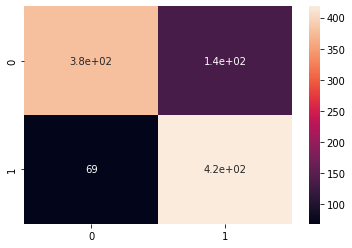

In [34]:
accuracy_score=metrics.accuracy_score(y_true=ys,y_pred=preds)
precision_score=metrics.precision_score(ys,preds)
recall_score=metrics.recall_score(ys,preds,)
f1_score=metrics.f1_score(ys,preds)
confion_metrix=metrics.confusion_matrix(ys,preds)
print('accuracy_score:',accuracy_score)
print('precision_score:',precision_score)
print('recall_score:',recall_score)
print('f1_score:',f1_score)

sn.heatmap(confion_metrix,annot=True)